In [1]:
# SMSSpamCollection.tsv from bb in jupyter notebok directory
# Helloworld of Neural Networks

In [2]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd

In [4]:
dataframe = pd.read_csv("SMSSpamCollection.tsv", sep="\t")

In [5]:
# Show first 5 rows
dataframe.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
message_length = []

for index, row in dataframe.iterrows():
    length_message_text = len(row.message)
    # Add the length of each text message to the list
    message_length.append(length_message_text)

In [7]:
message_length

[111,
 29,
 155,
 49,
 61,
 147,
 77,
 160,
 157,
 154,
 109,
 136,
 155,
 196,
 35,
 149,
 26,
 81,
 56,
 155,
 41,
 47,
 52,
 88,
 57,
 144,
 30,
 134,
 75,
 64,
 130,
 189,
 29,
 84,
 158,
 122,
 47,
 28,
 27,
 155,
 82,
 142,
 172,
 19,
 72,
 32,
 45,
 31,
 67,
 148,
 58,
 124,
 80,
 289,
 120,
 76,
 161,
 34,
 22,
 40,
 108,
 48,
 25,
 56,
 110,
 152,
 122,
 159,
 78,
 34,
 46,
 29,
 45,
 42,
 20,
 43,
 73,
 50,
 42,
 76,
 22,
 32,
 32,
 36,
 14,
 55,
 121,
 144,
 42,
 41,
 58,
 195,
 141,
 137,
 107,
 158,
 33,
 51,
 178,
 31,
 57,
 81,
 76,
 160,
 183,
 44,
 95,
 43,
 82,
 115,
 30,
 40,
 31,
 96,
 158,
 143,
 156,
 152,
 72,
 86,
 144,
 156,
 53,
 156,
 52,
 38,
 20,
 244,
 22,
 107,
 28,
 9,
 39,
 25,
 125,
 162,
 38,
 34,
 46,
 155,
 85,
 33,
 27,
 156,
 42,
 25,
 48,
 159,
 84,
 33,
 30,
 45,
 59,
 25,
 160,
 384,
 28,
 27,
 157,
 124,
 145,
 115,
 64,
 85,
 152,
 155,
 51,
 156,
 74,
 67,
 59,
 50,
 94,
 33,
 105,
 61,
 65,
 26,
 146,
 66,
 126,
 159,
 23,
 65,
 24,
 26,
 1

In [8]:
dataframe["length"] = message_length

In [9]:
dataframe.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
dataframe.tail()

,label,message,length
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


In [11]:
dataframe.isnull()

,label,message,length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5567,False,False,False
5568,False,False,False
5569,False,False,False
5570,False,False,False


In [12]:
# A"1" indicates missing values
dataframe.isnull().sum()

label      0
message    0
length     0
dtype: int64

In [13]:
len(dataframe)

5572

In [14]:
dataframe["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [15]:
dataframe["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
ham_data = []
spam_data = []

for index, row in dataframe.iterrows():
    # is label data = "ham"
    if row["label"] == "ham":
        ham_data.append(row)
    else:
        spam_data.append(row)
        
# Convert each list to a DF
ham_dataframe = pd.DataFrame(ham_data)
spam_dataframe = pd.DataFrame(spam_data)

In [17]:
ham_dataframe.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [18]:
ham_dataframe["length"].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: length, dtype: float64

In [19]:
spam_dataframe.head()

,label,message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [20]:
spam_dataframe["length"].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64

In [21]:
!pip install matplotlib
import matplotlib.pyplot as matplot_lib



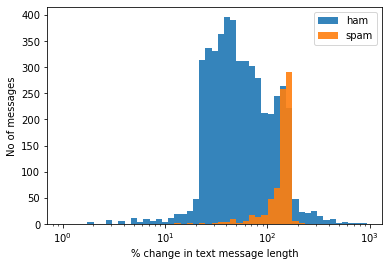

In [22]:
%matplotlib inline

matplot_lib.xscale('log')
matplot_lib.xlabel('% change in text message length')
matplot_lib.ylabel('No of messages')

bins = 1.15 **(np.arange(0,50))
matplot_lib.hist(dataframe[dataframe['label']=='ham']['length'], bins = bins, alpha = 0.9)
matplot_lib.hist(dataframe[dataframe['label']=='spam']['length'], bins = bins, alpha = 0.9)
matplot_lib.legend(("ham", "spam"))
matplot_lib.show()


In [23]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [24]:
punct_list = []
punct_count = 0

for index, textrow in dataframe.iterrows():
    doc_object = nlp(textrow.message)
    for token in doc_object:
        if token.pos == "PUNCT":
            punct_count += 1
    # Sentence is checked so add count to list
    punct_list.append(punct_count)
    punct_count = 0

In [25]:
# Check list contains the same no of items as the dataframe
print(len(punct_list))
print(len(dataframe))

5572
5572


In [26]:
dataframe["punct"] = punct_list

In [27]:
dataframe.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [28]:
dataframe["punct"].describe()

count    5572.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: punct, dtype: float64

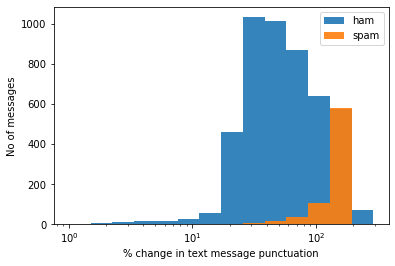

In [29]:
# enable the inlinebackend for usage with the ipython notebook
%matplotlib inline

matplot_lib.xscale('log')
matplot_lib.xlabel('% change in text message punctuation')
matplot_lib.ylabel('No of messages')

bins = 1.5 **(np.arange(0,15))
matplot_lib.hist(dataframe[dataframe['label']=='ham']['length'], bins = bins, alpha = 0.9)
matplot_lib.hist(dataframe[dataframe['label']=='spam']['length'], bins = bins, alpha = 0.9)
matplot_lib.legend(("ham", "spam"))
matplot_lib.show()

In [30]:
!pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in c:\users\asad\anaconda3\envs\ai2_course\lib\site-packages (0.22.2.post1)
Requirement already up-to-date: scipy in c:\users\asad\anaconda3\envs\ai2_course\lib\site-packages (1.4.1)
Requirement already up-to-date: matplotlib in c:\users\asad\anaconda3\envs\ai2_course\lib\site-packages (3.2.1)


In [31]:
# ML model creation using scikit learn
# Scikitlearn is open source ML library for regression, classification and others

# First split data into training and testing
from sklearn.model_selection import train_test_split


In [32]:
# X is the feature data
# We are creating a list of column names to use from the dataframe

# Syntax is important
X = dataframe[["length","punct"]]

y = dataframe["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [33]:
print("X train data shape", X_train.shape)
print("X test data shape", X_test.shape)


X train data shape (3900, 2)
X test data shape (1672, 2)


In [34]:
print("y train data shape", y_train.shape)
print("y test data shape", y_test.shape)

y train data shape (3900,)
y test data shape (1672,)


In [35]:
X_train

,length,punct
4393,30,0
216,58,0
4471,97,0
3889,34,0
5030,126,0
...,...,...
905,84,0
5192,69,0
3980,73,0
235,157,0


In [36]:
print(y_train)

4393     ham
216      ham
4471     ham
3889     ham
5030    spam
        ... 
905      ham
5192     ham
3980     ham
235     spam
5157     ham
Name: label, Length: 3900, dtype: object


In [37]:
# step 1: import the model
# step 2: create an instance of the model
# step 3: build a model and fit the data
# step 4: test accuracy

In [38]:
# Logistic Regression Classifier(Model)
# Step 1

from sklearn.linear_model import LogisticRegression

In [39]:
# Step 2
lin_reg_model = LogisticRegression(solver='lbfgs')

# Step 3
lin_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Testing Accuracy using test data
# Step 4
from sklearn import metrics

# Create a prediction set
# Model has not yet seen X_test
# And we know what to expect from answer in y_test
lin_reg_model_predictions = lin_reg_model.predict(X_test)

In [41]:
# Let's look at the prediction set
lin_reg_model_predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [42]:
# Now we can compare the model predicted with what is expected 
# as output using a confusion matrix

print(metrics.confusion_matrix(y_test, lin_reg_model_predictions))

[[1397   45]
 [ 228    2]]


In [43]:
dataframe_labels = pd.DataFrame(metrics.confusion_matrix(y_test, lin_reg_model_predictions), index=["Correct ham", "Correct spam"], columns=["Predicted ham", "Predicted spam"])
dataframe_labels

,Predicted ham,Predicted spam
Correct ham,1397,45
Correct spam,228,2


In [44]:
# Accuracy = (TotalPositive + TotalNegative) / Total no of records
# (1397 + 45) / 1672 
# 1442 / 1642 = 0.86

In [45]:
# Print a classification Report
print(metrics.classification_report(y_test, lin_reg_model_predictions))

              precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1442
        spam       0.04      0.01      0.01       230

    accuracy                           0.84      1672
   macro avg       0.45      0.49      0.46      1672
weighted avg       0.75      0.84      0.79      1672



In [46]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test, lin_reg_model_predictions))

0.8367224880382775


In [47]:
# Step 1
from sklearn.naive_bayes import MultinomialNB

# Step 2
nb_model = MultinomialNB()

# Step 3 - fit the model to training data
nb_model.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
# Predict
nb_model_predictions = nb_model.predict(X_test)

In [49]:
# Show metric in a confusion matrix
print(metrics.confusion_matrix(y_test, nb_model_predictions))


[[1442    0]
 [ 230    0]]


In [50]:
# This can not predict spam, it only is useful for ham
print(metrics.classification_report(y_test, nb_model_predictions))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.93      1442
        spam       0.00      0.00      0.00       230

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.74      0.86      0.80      1672



C:\Users\ASAD\Anaconda3\envs\AI2_course\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print(metrics.accuracy_score(y_test, nb_model_predictions))

0.8624401913875598


In [52]:
# Random Forest

In [53]:
# step 1: import the model
# step 2: create an instance of the model
# step 3: build a model and fit the data
# step 4: test accuracy

In [56]:
# Step 1
from sklearn.ensemble import RandomForestClassifier

# Step 2
rf_model = RandomForestClassifier()

# Step 3
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
# Predict answers to data from the X_test data
# contains text length and punctuation count

rf_model_predictions = rf_model.predict(X_test)

In [58]:
rf_model_predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [59]:
print(metrics.confusion_matrix(y_test, rf_model_predictions))

[[1362   80]
 [ 115  115]]


In [60]:
print(metrics.classification_report(y_test, rf_model_predictions))

              precision    recall  f1-score   support

         ham       0.92      0.94      0.93      1442
        spam       0.59      0.50      0.54       230

    accuracy                           0.88      1672
   macro avg       0.76      0.72      0.74      1672
weighted avg       0.88      0.88      0.88      1672



In [61]:
print(metrics.accuracy_score(y_test, rf_model_predictions))

0.8833732057416268


In [62]:
# Overall accuracy of the model suggests that it is better than 
# logistic regression(0.84) and Naive Bayes(0.86)

In [63]:
# Support Vector Classifier

In [64]:
# Step 1
from sklearn.svm import SVC

In [67]:
# Step 2
svc_model = SVC(gamma = "auto")

In [68]:
# Step 3
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
# Predictions
svc_model_predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, svc_model_predictions))

[[1363   79]
 [ 108  122]]


In [74]:
# Overall confusion is (108 + 79) = 187. This is better than Naive Bayes model (234) and Logistic Regression Classifier(271)

In [72]:
print(metrics.classification_report(y_test, svc_model_predictions))

              precision    recall  f1-score   support

         ham       0.93      0.95      0.94      1442
        spam       0.61      0.53      0.57       230

    accuracy                           0.89      1672
   macro avg       0.77      0.74      0.75      1672
weighted avg       0.88      0.89      0.88      1672



In [73]:
print(metrics.accuracy_score(y_test, svc_model_predictions))

0.8881578947368421


In [75]:
# Accuracy Summary

# Logistic Regression: 83.67
# Random Forest: 88.33
# Naive Bayes: 86.24
# Support Vector Classifier: 88.81